In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
%cd drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json

pd.set_option('display.max_columns', None)

In [3]:
# 1. 나눔 폰트 설치 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,291 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [12]:
# 2. matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [5]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### 1. 금천구

In [6]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

금천_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/금천구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =금천_df['동']
금천_df = 금천_df.iloc[:,2:]
금천_df = 금천_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
금천_df

,인구 수,생활보호대상자 비율
0,0.446362,0.000000
1,1.000000,0.237411
2,0.285085,0.601043
3,0.524221,0.166385
4,0.187777,0.379361
5,0.744424,0.283876
6,0.328420,0.572631
7,0.000000,0.121836
8,0.311038,0.592750
9,0.274813,1.000000


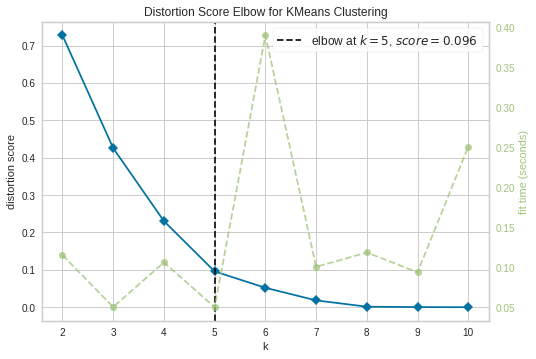

In [7]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(금천_df)
Elbow_M.show()

plt.show()

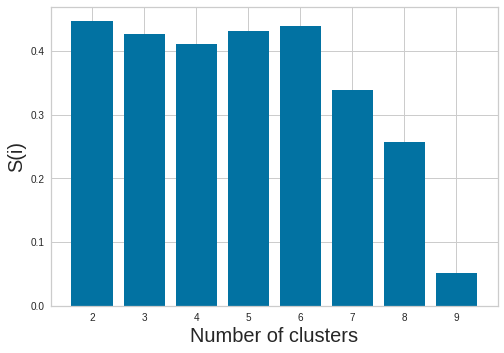

In [8]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(금천_df)
    silhouette_scores.append(silhouette_score(금천_df, m1.fit_predict(금천_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [9]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


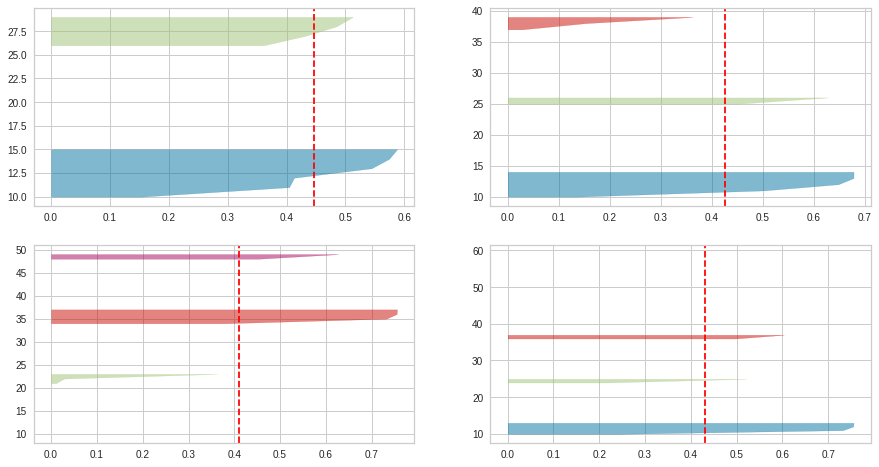

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(금천_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


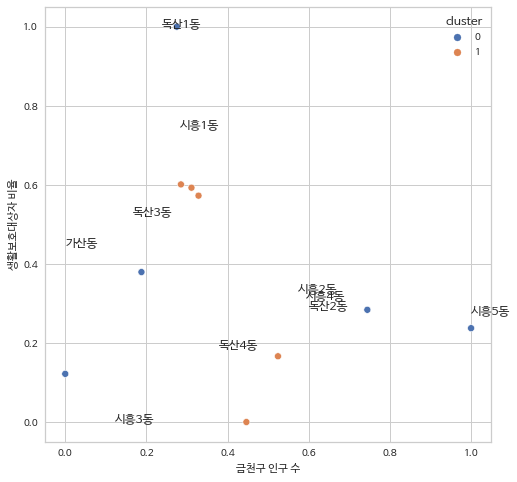

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


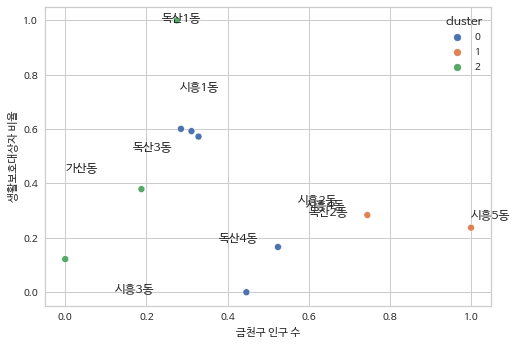

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


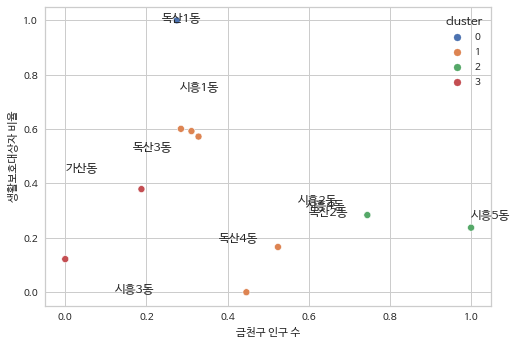

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


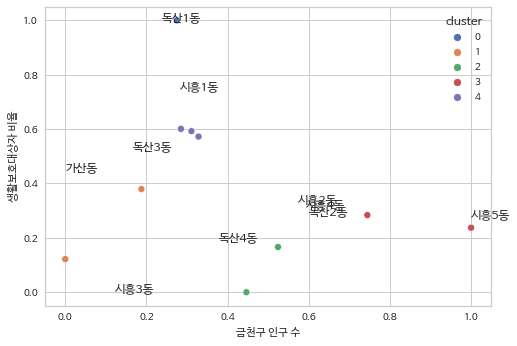

In [13]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(금천_df)
  금천_df['cluster'] = model.fit_predict(금천_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 금천_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 금천_df['생활보호대상자 비율']
  cluster_df['cluster'] = 금천_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('금천구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=3으로 결정

In [14]:
k = 3

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(금천_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
금천_df['cluster'] = model.fit_predict(금천_df)

In [15]:
금천_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    4
1    3
0    3
Name: cluster, dtype: int64

In [16]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.1541968 , 0.50039903, 0.66666667],
       [0.30818088, 0.58880784, 4.        ],
       [0.6787516 , 0.17191796, 2.5       ]])

In [17]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 금천_df['인구 수']
cluster_df['생활보호대상자 비율'] = 금천_df['생활보호대상자 비율']
cluster_df['cluster'] = 금천_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,가산동,0.446362,0.000000,2
1,독산1동,1.000000,0.237411,2
2,독산2동,0.285085,0.601043,1
3,독산3동,0.524221,0.166385,2
4,독산4동,0.187777,0.379361,0
5,시흥1동,0.744424,0.283876,2
6,시흥2동,0.328420,0.572631,1
7,시흥3동,0.000000,0.121836,0
8,시흥4동,0.311038,0.592750,1
9,시흥5동,0.274813,1.000000,0


In [18]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,가산동,0.446362,0.000000,2
1,독산1동,1.000000,0.237411,2
2,독산2동,0.285085,0.601043,1
3,독산3동,0.524221,0.166385,2
4,독산4동,0.187777,0.379361,0
5,시흥1동,0.744424,0.283876,2
6,시흥2동,0.328420,0.572631,1
7,시흥3동,0.000000,0.121836,0
8,시흥4동,0.311038,0.592750,1
9,시흥5동,0.274813,1.000000,0


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/금천_cluster.csv')

#### 1-1. 군집화

In [19]:
# 클러스터별로 동 이름 출력하기

for i in range(3):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['독산4동', '시흥3동', '시흥5동']
cluster 1 :  ['독산2동', '시흥2동', '시흥4동']
cluster 2 :  ['가산동', '독산1동', '독산3동', '시흥1동']


#### 1-2. 클러스터별 인구수, 체육시설 수

In [20]:
# 클러스터별로 인구 수 합치기

금천_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/금천구_인구수, 수급인구비율.csv', index_col=0)
금천_peo_df = 금천_peo_df[['동', '인구 수']]
금천_peo_df = 금천_peo_df.rename(columns={'동':'dong'})
금천_peo_df

,dong,인구 수
0,가산동,25973.0
1,독산1동,44191.0
2,독산2동,20666.0
3,독산3동,28535.0
4,독산4동,17464.0
5,시흥1동,35781.0
6,시흥2동,22092.0
7,시흥3동,11285.0
8,시흥4동,21520.0
9,시흥5동,20328.0


In [21]:
df_all = pd.merge(cluster_df, 금천_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,가산동,0.446362,0.000000,2,25973.0
1,독산1동,1.000000,0.237411,2,44191.0
2,독산2동,0.285085,0.601043,1,20666.0
3,독산3동,0.524221,0.166385,2,28535.0
4,독산4동,0.187777,0.379361,0,17464.0
5,시흥1동,0.744424,0.283876,2,35781.0
6,시흥2동,0.328420,0.572631,1,22092.0
7,시흥3동,0.000000,0.121836,0,11285.0
8,시흥4동,0.311038,0.592750,1,21520.0
9,시흥5동,0.274813,1.000000,0,20328.0


In [22]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  49077.0
cluster 1 :  64278.0
cluster 2 :  134480.0


In [23]:
# 금천구 공체시설 수요만큼(5개) 입지선정
# 클러스터별로 인구 만명당 공체시설 비율이 비슷해지도록

# a+b+c=5

def prop(a, b, c):
  
  p1 = a*10000/49077
  p2 = b*10000/134480
  p3 = c*10000/64278

  return ((p1-p2)**2 + (p1-p3)**2 + (p2-p3)**2)

In [24]:
from itertools import product

In [25]:
lst = []

for i, j, k in product(range(6), range(6), range(6)):
  if (i+j+k==5):
    lst.append([prop(i,j,k), (i,j,k)])

In [26]:
lst.sort()
lst

[[0.007252504330650812, (1, 3, 1)],
 [0.04094409655145514, (1, 2, 2)],
 [0.1305034971742451, (2, 2, 1)],
 [0.13280154737171312, (0, 4, 1)],
 [0.13876651332980022, (1, 4, 0)],
 [0.15433450016267364, (0, 3, 2)],
 [0.17635372882489322, (2, 1, 2)],
 [0.23984128999221319, (1, 1, 3)],
 [0.24985886674355062, (2, 3, 0)],
 [0.2764741958007064, (0, 5, 0)],
 [0.3410730541735878, (0, 2, 3)],
 [0.3874095616954951, (2, 0, 3)],
 [0.5025545259024958, (3, 1, 1)],
 [0.5605633969829878, (3, 0, 2)],
 [0.603944084652925, (1, 0, 4)],
 [0.6097512560419577, (3, 2, 0)],
 [0.6930172094044558, (0, 1, 4)],
 [1.1234055905154032, (4, 0, 1)],
 [1.2101669658552774, (0, 0, 5)],
 [1.218443681225021, (4, 1, 0)],
 [2.075936142292741, (5, 0, 0)]]

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '독산4동', '시흥3동', '시흥5동' (1개)
- cluster1 : '가산동', '독산1동', '독산3동', '시흥1동' (3개)
- cluster2 : '독산2동', '시흥2동', '시흥4동' (1개)

#### **2020년 기준 금천구 공공체육시설 설치 개수**
- cluster0 : 독산4동(2개) + 시흥3동(0개) + 시흥5동(0개) = 2개
- cluster1 : 가산동(0개) + 독산1동(2개) + 독산3동(0개) + 시흥1동(1개) = 3개
- cluster2 : 독산2동(0개) + 시흥2동(1개) + 시흥4동(0개) = 1개

### 2. 서대문구

In [27]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

서대문_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/서대문구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =서대문_df['동']
서대문_df = 서대문_df.iloc[:,2:]
서대문_df = 서대문_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
서대문_df

,인구 수,생활보호대상자 비율
0,0.149974,0.924647
1,0.414598,0.467839
2,0.000000,0.785922
3,0.066570,0.979826
4,0.360583,0.601857
5,0.540955,0.927890
6,0.072948,0.000000
7,0.672641,0.856628
8,0.170482,0.401251
9,0.751403,1.000000


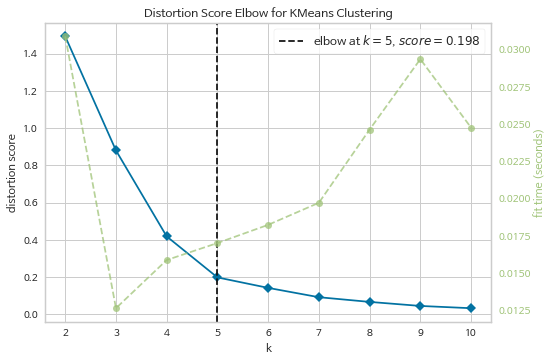

In [28]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(서대문_df)
Elbow_M.show()

plt.show()

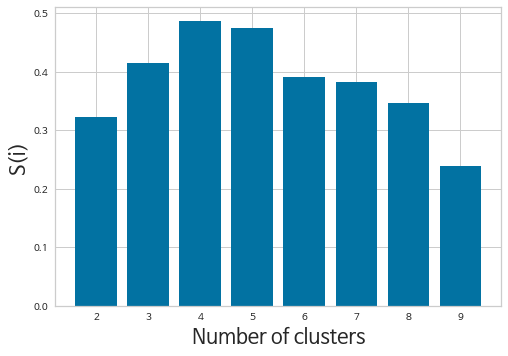

In [29]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(서대문_df)
    silhouette_scores.append(silhouette_score(서대문_df, m1.fit_predict(서대문_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [30]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  4


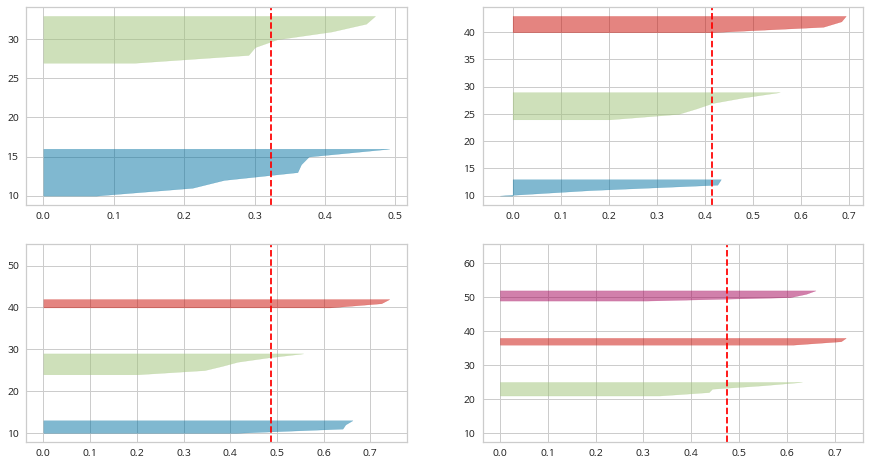

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(서대문_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


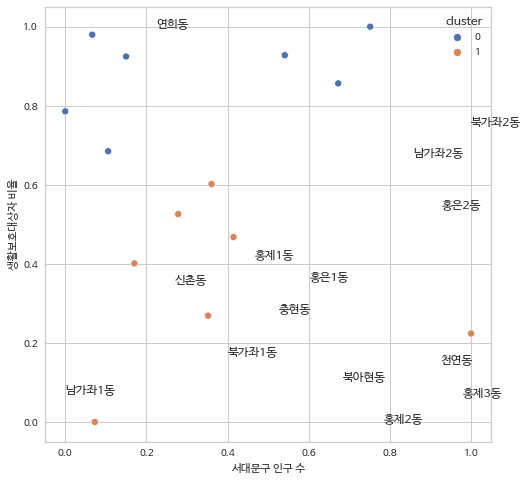

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


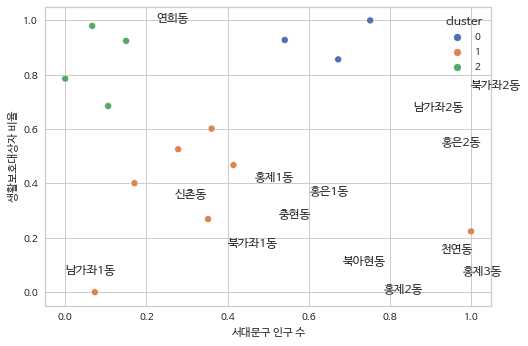

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


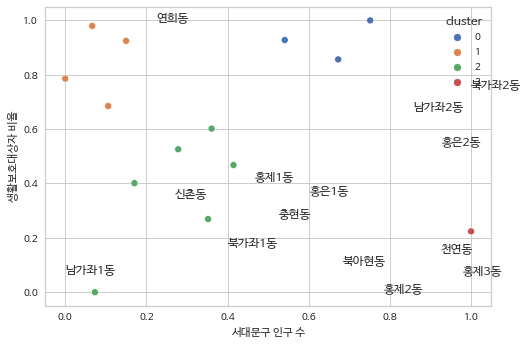

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


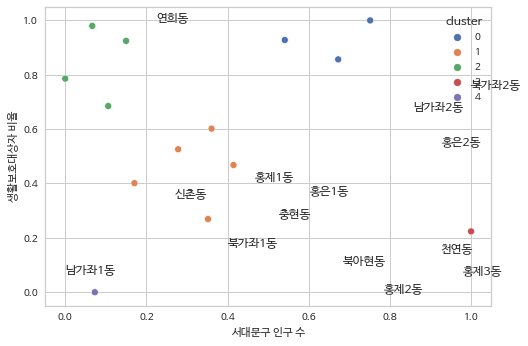

In [32]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(서대문_df)
  서대문_df['cluster'] = model.fit_predict(서대문_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 서대문_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 서대문_df['생활보호대상자 비율']
  cluster_df['cluster'] = 서대문_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('서대문구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [33]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(서대문_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
서대문_df['cluster'] = model.fit_predict(서대문_df)

In [34]:
서대문_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    5
1    4
0    3
3    2
Name: cluster, dtype: int64

In [35]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[6.54999798e-01, 9.28172629e-01, 2.22044605e-16],
       [8.05982802e-02, 8.43838377e-01, 2.00000000e+00],
       [3.15183077e-01, 4.53209101e-01, 1.00000000e+00],
       [5.36474103e-01, 1.11927440e-01, 3.50000000e+00]])

In [36]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 서대문_df['인구 수']
cluster_df['생활보호대상자 비율'] = 서대문_df['생활보호대상자 비율']
cluster_df['cluster'] = 서대문_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,천연동,0.149974,0.924647,1
1,홍제1동,0.414598,0.467839,2
2,홍제2동,0.000000,0.785922,1
3,홍제3동,0.066570,0.979826,1
4,홍은1동,0.360583,0.601857,2
5,홍은2동,0.540955,0.927890,0
6,남가좌1동,0.072948,0.000000,3
7,남가좌2동,0.672641,0.856628,0
8,북가좌1동,0.170482,0.401251,2
9,북가좌2동,0.751403,1.000000,0


In [37]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,천연동,0.149974,0.924647,1
1,홍제1동,0.414598,0.467839,2
2,홍제2동,0.000000,0.785922,1
3,홍제3동,0.066570,0.979826,1
4,홍은1동,0.360583,0.601857,2
5,홍은2동,0.540955,0.927890,0
6,남가좌1동,0.072948,0.000000,3
7,남가좌2동,0.672641,0.856628,0
8,북가좌1동,0.170482,0.401251,2
9,북가좌2동,0.751403,1.000000,0


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/서대문_cluster.csv')

#### 2-1. 군집화

In [38]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['홍은2동', '남가좌2동', '북가좌2동']
cluster 1 :  ['천연동', '홍제2동', '홍제3동', '북아현동']
cluster 2 :  ['홍제1동', '홍은1동', '북가좌1동', '충현동', '신촌동']
cluster 3 :  ['남가좌1동', '연희동']


#### 2-2. 클러스터별 인구수, 체육시설 수

In [39]:
# 클러스터별로 인구 수 합치기

서대문_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/서대문구_인구수, 수급인구비율.csv', index_col=0)
서대문_peo_df = 서대문_peo_df[['동', '인구 수']]
서대문_peo_df = 서대문_peo_df.rename(columns={'동':'dong'})
서대문_peo_df

,dong,인구 수
0,천연동,18049.0
1,홍제1동,24604.0
2,홍제2동,14334.0
3,홍제3동,15983.0
4,홍은1동,23266.0
5,홍은2동,27734.0
6,남가좌1동,16141.0
7,남가좌2동,30996.0
8,북가좌1동,18557.0
9,북가좌2동,32947.0


In [40]:
df_all = pd.merge(cluster_df, 서대문_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,천연동,0.149974,0.924647,1,18049.0
1,홍제1동,0.414598,0.467839,2,24604.0
2,홍제2동,0.000000,0.785922,1,14334.0
3,홍제3동,0.066570,0.979826,1,15983.0
4,홍은1동,0.360583,0.601857,2,23266.0
5,홍은2동,0.540955,0.927890,0,27734.0
6,남가좌1동,0.072948,0.000000,3,16141.0
7,남가좌2동,0.672641,0.856628,0,30996.0
8,북가좌1동,0.170482,0.401251,2,18557.0
9,북가좌2동,0.751403,1.000000,0,32947.0


In [41]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  91677.0
cluster 1 :  65322.0
cluster 2 :  110707.0
cluster 3 :  55246.0


In [42]:
# a+b+c+d=7

def prop(a, b, c, d):
  
  p1 = a*10000/91677
  p2 = b*10000/65322
  p3 = c*10000/110707
  p4 = d*10000/55246

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [43]:
lst = []

In [44]:
for i, j, k, l in product(range(8), range(8), range(8), range(8)):
  if (i+j+k+l==7):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [45]:
lst

[[4.816323576653945, (0, 0, 0, 7)],
 [3.36679831529582, (0, 0, 1, 6)],
 [2.2282140961161856, (0, 0, 2, 5)],
 [1.40057091911504, (0, 0, 3, 4)],
 [0.8838687842923835, (0, 0, 4, 3)],
 [0.6781076916482159, (0, 0, 5, 2)],
 [0.7832876411825376, (0, 0, 6, 1)],
 [1.1994086328953482, (0, 0, 7, 0)],
 [3.2763086288369707, (0, 1, 0, 6)],
 [2.083832495962539, (0, 1, 1, 5)],
 [1.2022974052665965, (0, 1, 2, 4)],
 [0.6317033567491429, (0, 1, 3, 3)],
 [0.37205035041017825, (0, 1, 4, 2)],
 [0.4233383862497028, (0, 1, 5, 1)],
 [0.7855674642677164, (0, 1, 6, 0)],
 [2.1843343350539697, (0, 2, 0, 5)],
 [1.24890733066323, (0, 2, 1, 4)],
 [0.6244213684509793, (0, 2, 2, 3)],
 [0.3108764484172176, (0, 2, 3, 2)],
 [0.308272570561945, (0, 2, 4, 1)],
 [0.6166097348851614, (0, 2, 5, 0)],
 [1.5404006953049403, (0, 3, 0, 4)],
 [0.8620228193978925, (0, 3, 1, 3)],
 [0.4945859856693338, (0, 3, 2, 2)],
 [0.4380901941192641, (0, 3, 3, 1)],
 [0.6925354447476835, (0, 3, 4, 0)],
 [1.344507709589883, (0, 4, 0, 3)],
 [0.923178

In [46]:
lst.sort()

In [47]:
lst

[[0.031180209490282842, (2, 1, 3, 1)],
 [0.041955305917017925, (2, 2, 2, 1)],
 [0.07473505815958419, (3, 1, 2, 1)],
 [0.09523595922314433, (1, 2, 3, 1)],
 [0.10363901597917821, (2, 1, 2, 2)],
 [0.14738131885365569, (1, 1, 4, 1)],
 [0.14843061064356572, (3, 2, 1, 1)],
 [0.15796670417834116, (1, 1, 3, 2)],
 [0.15971325824262686, (1, 2, 2, 2)],
 [0.16830602610071038, (2, 2, 1, 2)],
 [0.20906728581268946, (3, 1, 1, 2)],
 [0.22654562791181448, (2, 2, 3, 0)],
 [0.24592294492067962, (3, 0, 3, 1)],
 [0.2513438726849679, (3, 1, 3, 0)],
 [0.2652885523086248, (2, 0, 4, 1)],
 [0.2696624451798765, (2, 1, 4, 0)],
 [0.27114751147415234, (3, 2, 2, 0)],
 [0.2780458648615598, (4, 1, 1, 1)],
 [0.28385544510272304, (2, 0, 3, 2)],
 [0.2879740388377099, (1, 3, 2, 1)],
 [0.2976138415888299, (2, 3, 1, 1)],
 [0.308272570561945, (0, 2, 4, 1)],
 [0.3108764484172176, (0, 2, 3, 2)],
 [0.3263632588789878, (3, 0, 2, 2)],
 [0.3366547519914681, (3, 2, 0, 2)],
 [0.3416997023821508, (1, 2, 4, 0)],
 [0.37205035041017825,

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '홍은2동', '남가좌2동', '북가좌2동' (2개)
- cluster1 : '천연동', '홍제2동', '홍제3동', '북아현동' (1개)
- cluster2 : '홍제1동', '홍은1동', '북가좌1동', '충현동', '신촌동' (3개)
- cluster3 : '남가좌1동', '연희동' (1개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 홍은2동(1개) + 남가좌2동(1개) + 북가좌2동(0개) = 2개
- cluster1 : 천연동(0개) + 홍제2동(1개) + 홍제3동(0개) + 북아현동(1개) = 2개
- cluster2 : 홍제1동(0개) + 홍은1동(0개) + 북가좌1동(0개) + 충현동(0개) + 신촌동(1개) = 1개
- cluster3 : 남가좌1동(0개) + 연희동(2개) = 2개

### 3. 마포구

In [48]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

마포_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/마포구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =마포_df['동']
마포_df = 마포_df.iloc[:,2:]
마포_df = 마포_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
마포_df

,인구 수,생활보호대상자 비율
0,0.337817,0.182198
1,0.107858,0.377893
2,0.000000,0.376703
3,0.386333,0.117565
4,0.507714,0.094878
5,0.205431,0.455475
6,0.296673,0.499622
7,0.228448,0.395222
8,0.137313,0.124357
9,0.245100,0.381192


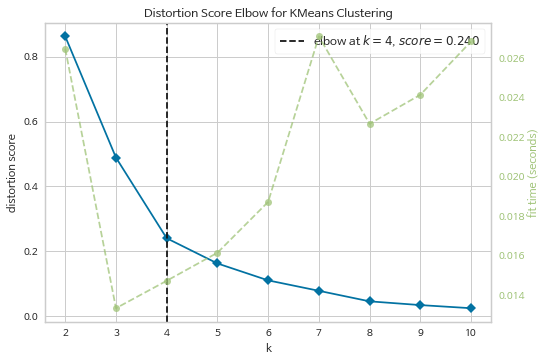

In [49]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(마포_df)
Elbow_M.show()

plt.show()


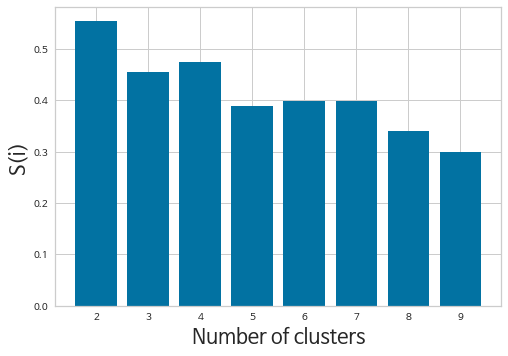

In [50]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(마포_df)
    silhouette_scores.append(silhouette_score(마포_df, m1.fit_predict(마포_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [51]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


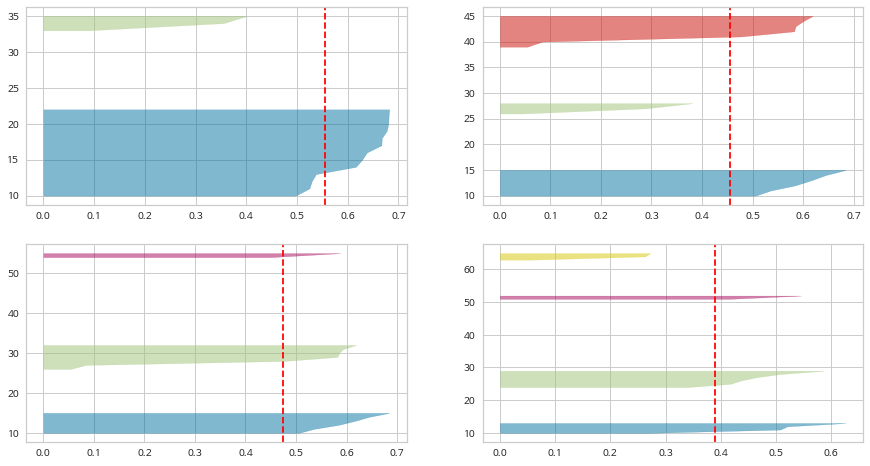

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(마포_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


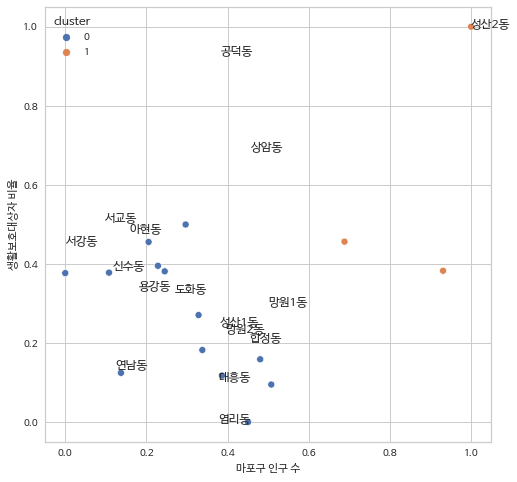

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


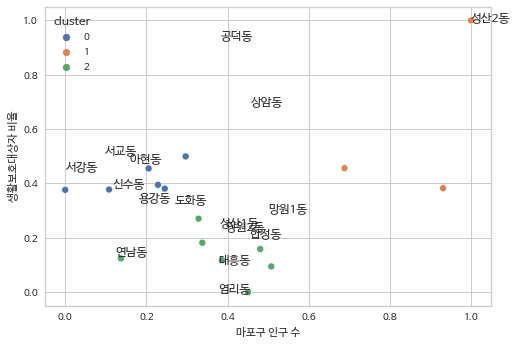

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


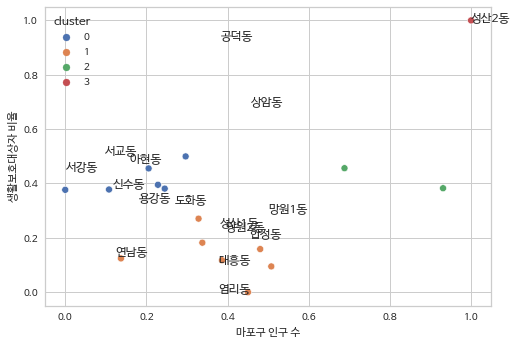

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


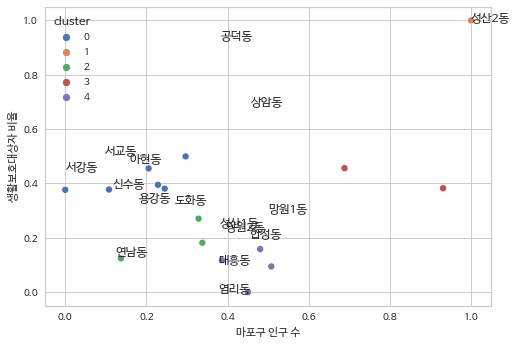

In [53]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(마포_df)
  마포_df['cluster'] = model.fit_predict(마포_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 마포_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 마포_df['생활보호대상자 비율']
  cluster_df['cluster'] = 마포_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('마포구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [54]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(마포_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
마포_df['cluster'] = model.fit_predict(마포_df)

In [55]:
마포_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

1    6
2    5
0    4
3    1
Name: cluster, dtype: int64

In [56]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.45619493, 0.09278882, 4.        ],
       [0.18058503, 0.41435121, 0.        ],
       [0.48454594, 0.28322798, 2.4       ],
       [1.        , 1.        , 1.        ]])

In [57]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 마포_df['인구 수']
cluster_df['생활보호대상자 비율'] = 마포_df['생활보호대상자 비율']
cluster_df['cluster'] = 마포_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,용강동,0.337817,0.182198,2
1,대흥동,0.107858,0.377893,1
2,염리동,0.000000,0.376703,1
3,신수동,0.386333,0.117565,0
4,서교동,0.507714,0.094878,0
5,합정동,0.205431,0.455475,1
6,망원1동,0.296673,0.499622,1
7,망원2동,0.228448,0.395222,1
8,연남동,0.137313,0.124357,2
9,성산1동,0.245100,0.381192,1


In [58]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,용강동,0.337817,0.182198,2
1,대흥동,0.107858,0.377893,1
2,염리동,0.000000,0.376703,1
3,신수동,0.386333,0.117565,0
4,서교동,0.507714,0.094878,0
5,합정동,0.205431,0.455475,1
6,망원1동,0.296673,0.499622,1
7,망원2동,0.228448,0.395222,1
8,연남동,0.137313,0.124357,2
9,성산1동,0.245100,0.381192,1


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/마포_cluster.csv')

#### 3-1. 군집화

In [59]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['신수동', '서교동', '서강동', '아현동']
cluster 1 :  ['대흥동', '염리동', '합정동', '망원1동', '망원2동', '성산1동']
cluster 2 :  ['용강동', '연남동', '상암동', '도화동', '공덕동']
cluster 3 :  ['성산2동']


#### 3-2. 클러스터별 인구수, 체육시설 수

In [60]:
# 클러스터별로 인구 수 합치기

마포_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/마포구_인구수, 수급인구비율.csv', index_col=0)
마포_peo_df = 마포_peo_df[['동', '인구 수']]
마포_peo_df = 마포_peo_df.rename(columns={'동':'dong'})
마포_peo_df

,dong,인구 수
0,용강동,22257.0
1,대흥동,15863.0
2,염리동,12864.0
3,신수동,23606.0
4,서교동,26981.0
5,합정동,18576.0
6,망원1동,21113.0
7,망원2동,19216.0
8,연남동,16682.0
9,성산1동,19679.0


In [61]:
df_all = pd.merge(cluster_df, 마포_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,용강동,0.337817,0.182198,2,22257.0
1,대흥동,0.107858,0.377893,1,15863.0
2,염리동,0.000000,0.376703,1,12864.0
3,신수동,0.386333,0.117565,0,23606.0
4,서교동,0.507714,0.094878,0,26981.0
5,합정동,0.205431,0.455475,1,18576.0
6,망원1동,0.296673,0.499622,1,21113.0
7,망원2동,0.228448,0.395222,1,19216.0
8,연남동,0.137313,0.124357,2,16682.0
9,성산1동,0.245100,0.381192,1,19679.0


In [62]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  102194.0
cluster 1 :  107311.0
cluster 2 :  131684.0
cluster 3 :  40669.0


In [63]:
# a+b+c+d=8

def prop(a, b, c, d):
  
  p1 = a*10000/102194
  p2 = b*10000/107311
  p3 = c*10000/131684
  p4 = d*10000/40669

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [64]:
lst = []

for i, j, k, l in product(range(9), range(9), range(9), range(9)):
  if (i+j+k+l==8):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [65]:
lst.sort()
lst

[[0.009222367998501256, (2, 2, 3, 1)],
 [0.03774508843078406, (2, 3, 2, 1)],
 [0.04740405999286286, (3, 2, 2, 1)],
 [0.07596073500162935, (1, 3, 3, 1)],
 [0.08851296819781677, (3, 1, 3, 1)],
 [0.0928163939716135, (1, 2, 4, 1)],
 [0.09570965560572214, (2, 1, 4, 1)],
 [0.1213051598274126, (3, 3, 1, 1)],
 [0.17411508407114887, (1, 4, 2, 1)],
 [0.17909671901699403, (2, 3, 3, 0)],
 [0.18127781690257055, (2, 4, 1, 1)],
 [0.19034165062396813, (3, 2, 3, 0)],
 [0.19084586474541154, (2, 2, 4, 0)],
 [0.20309199875738523, (4, 1, 2, 1)],
 [0.20736146995469826, (4, 2, 1, 1)],
 [0.22397088429781759, (3, 3, 2, 0)],
 [0.22468206098110136, (1, 1, 5, 1)],
 [0.23595209953994845, (0, 3, 4, 1)],
 [0.24463188444227435, (3, 0, 4, 1)],
 [0.25599827170364436, (1, 3, 4, 0)],
 [0.2717224249896223, (3, 1, 4, 0)],
 [0.28235758132808025, (2, 4, 2, 0)],
 [0.28872806920720095, (0, 4, 3, 1)],
 [0.2972069512524467, (2, 0, 5, 1)],
 [0.29818613791219956, (0, 2, 5, 1)],
 [0.29965384308936655, (2, 2, 2, 2)],
 [0.31021626770

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '신수동', '서교동', '서강동', '아현동' (2개)
- cluster1 : '대흥동', '염리동', '합정동', '망원1동', '망원2동', '성산1동' (2개)
- cluster2 : '용강동', '연남동', '상암동', '도화동', '공덕동' (3개)
- cluster3 : '성산2동' (1개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 신수동(1개) + 서교동(0개) + 서강동(0개) + 아현동(1개) = 2개
- cluster1 : 대흥동(2개) + 염리동(0개) + 합정동(0개) + 망원1동(0개) + 망원2동(1개) + 성산1동(1개) = 4개
- cluster2 : 용강동(1개) + 연남동(0개) + 상암동(0개) + 도화동(0개) + 공덕동(1개) = 2개
- cluster3 : 성산2동(3개) = 3개

### 4. 중구

In [66]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

중구_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/중구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =중구_df['동']
중구_df = 중구_df.iloc[:,2:]
중구_df = 중구_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
중구_df

,인구 수,생활보호대상자 비율
0,0.067849,0.000000
1,0.246312,1.000000
2,0.111653,0.095991
3,0.181127,0.049312
4,0.227530,0.105963
5,0.289140,0.211977
6,0.000000,0.713043
7,0.578410,0.334665
8,0.751544,0.292376
9,0.704101,0.456875


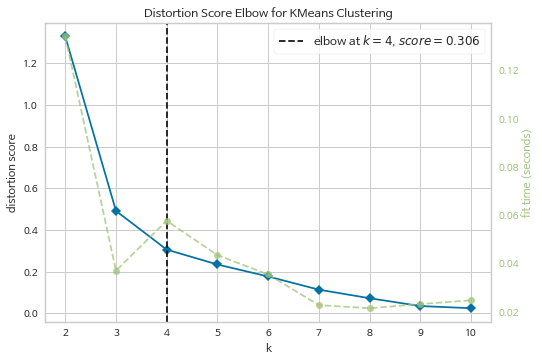

In [67]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(중구_df)
Elbow_M.show()

plt.show()

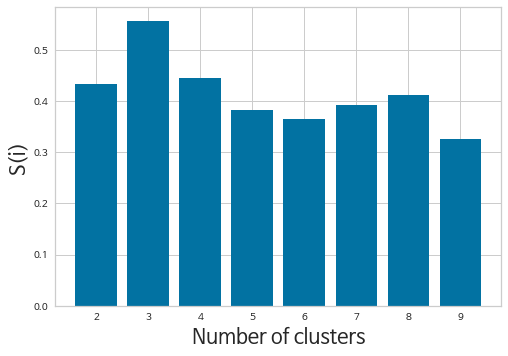

In [68]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(중구_df)
    silhouette_scores.append(silhouette_score(중구_df, m1.fit_predict(중구_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [69]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


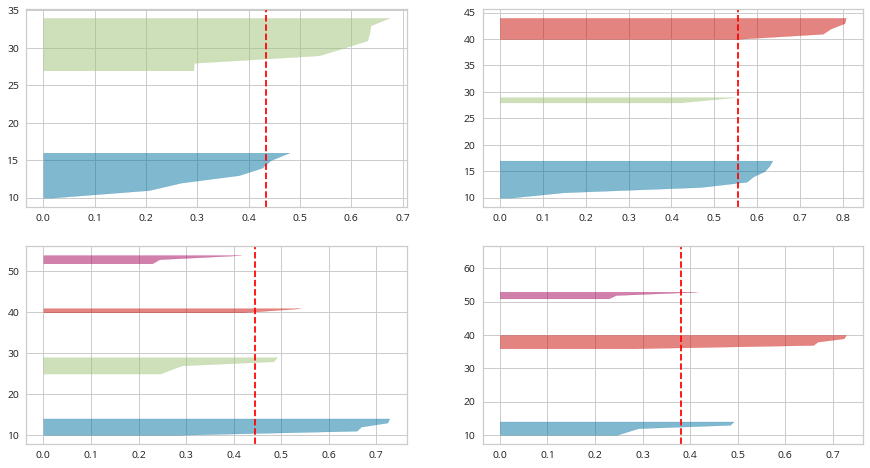

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(중구_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


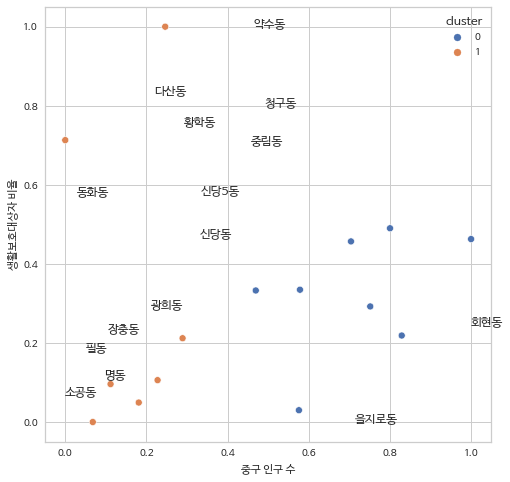

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


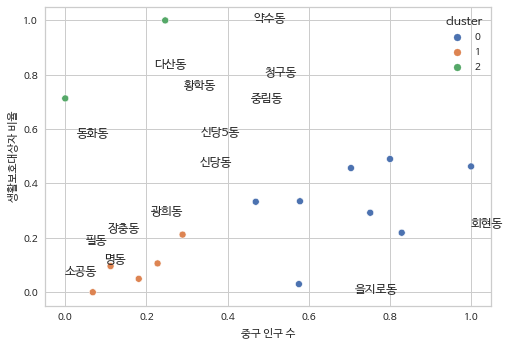

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


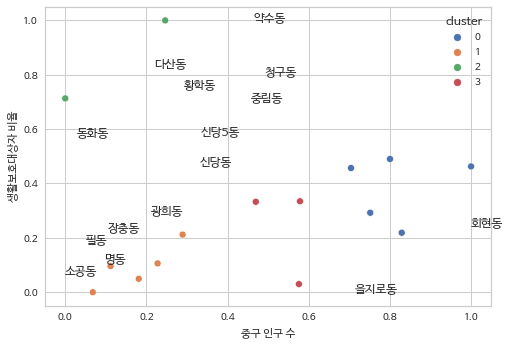

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


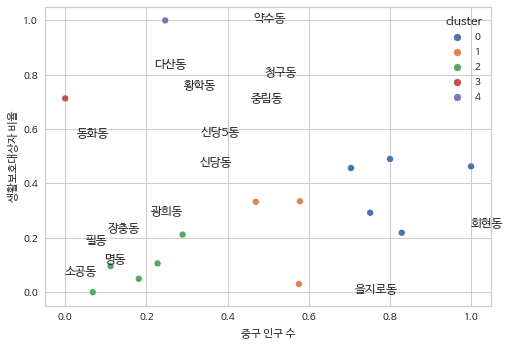

In [71]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(중구_df)
  중구_df['cluster'] = model.fit_predict(중구_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 중구_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 중구_df['생활보호대상자 비율']
  cluster_df['cluster'] = 중구_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('중구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()


k=4

In [72]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(중구_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
중구_df['cluster'] = model.fit_predict(중구_df)

In [73]:
중구_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    5
1    5
3    3
0    2
Name: cluster, dtype: int64

In [74]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.12315591, 0.85652152, 3.5       ],
       [0.81701436, 0.3842026 , 0.        ],
       [0.1754598 , 0.09264862, 2.        ],
       [0.54123611, 0.23243403, 1.        ]])

In [75]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 중구_df['인구 수']
cluster_df['생활보호대상자 비율'] = 중구_df['생활보호대상자 비율']
cluster_df['cluster'] = 중구_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,소공동,0.067849,0.000000,2
1,회현동,0.246312,1.000000,0
2,명동,0.111653,0.095991,2
3,필동,0.181127,0.049312,2
4,장충동,0.227530,0.105963,2
5,광희동,0.289140,0.211977,2
6,을지로동,0.000000,0.713043,0
7,신당5동,0.578410,0.334665,3
8,황학동,0.751544,0.292376,1
9,중림동,0.704101,0.456875,1


In [76]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,소공동,0.067849,0.000000,2
1,회현동,0.246312,1.000000,0
2,명동,0.111653,0.095991,2
3,필동,0.181127,0.049312,2
4,장충동,0.227530,0.105963,2
5,광희동,0.289140,0.211977,2
6,을지로동,0.000000,0.713043,0
7,신당5동,0.578410,0.334665,3
8,황학동,0.751544,0.292376,1
9,중림동,0.704101,0.456875,1


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/중구_cluster.csv')

In [77]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['회현동', '을지로동']
cluster 1 :  ['황학동', '중림동', '다산동', '약수동', '청구동']
cluster 2 :  ['소공동', '명동', '필동', '장충동', '광희동']
cluster 3 :  ['신당5동', '신당동', '동화동']


### 5. 구로구

In [78]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

구로_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/구로구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =구로_df['동']
구로_df = 구로_df.iloc[:,2:]
구로_df = 구로_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
구로_df

,인구 수,생활보호대상자 비율
0,0.872078,0.019501
1,0.289071,0.000000
2,0.736976,0.639076
3,0.449514,0.267071
4,0.422407,0.705713
5,0.709085,0.203414
6,0.364193,0.515424
7,0.533108,0.790313
8,0.822846,0.904466
9,0.704339,0.435399


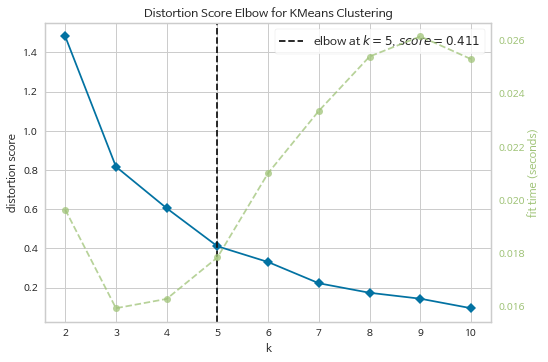

In [79]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(구로_df)
Elbow_M.show()

plt.show()

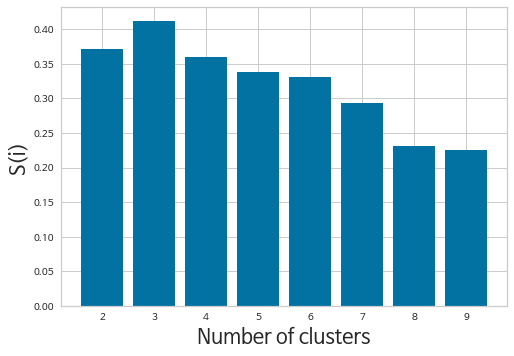

In [80]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(구로_df)
    silhouette_scores.append(silhouette_score(구로_df, m1.fit_predict(구로_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [81]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


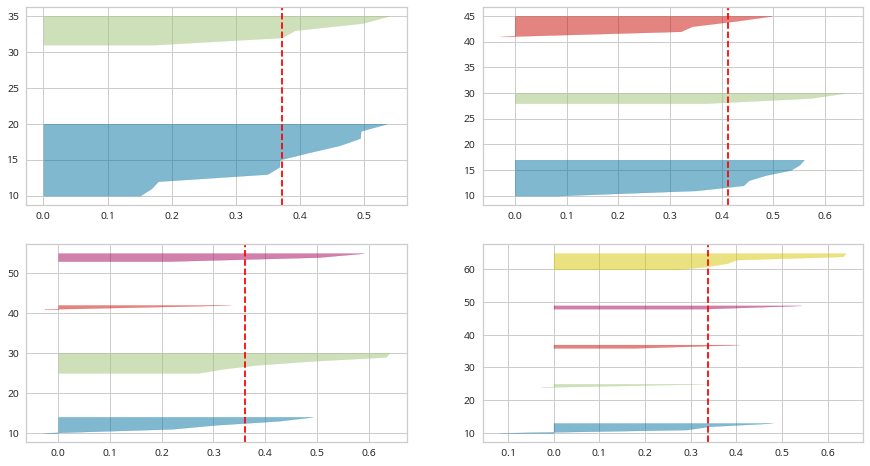

In [82]:

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(구로_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


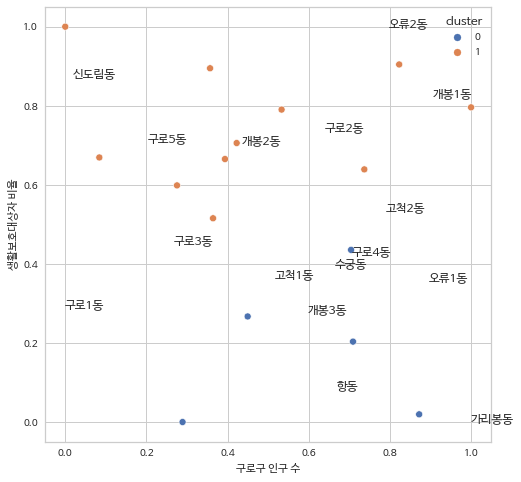

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


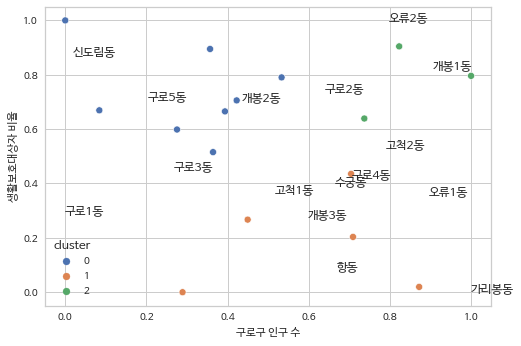

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


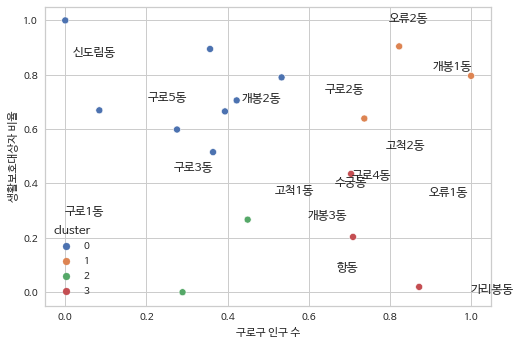

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


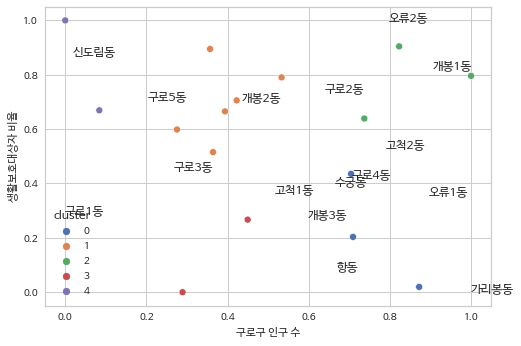

In [83]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(구로_df)
  구로_df['cluster'] = model.fit_predict(구로_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 구로_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 구로_df['생활보호대상자 비율']
  cluster_df['cluster'] = 구로_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('구로구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=3으로 결정

In [84]:
k = 3

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(구로_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
구로_df['cluster'] = model.fit_predict(구로_df)

In [85]:
구로_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    9
1    4
2    3
Name: cluster, dtype: int64

In [86]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.54504681, 0.72329273, 1.33333333],
       [0.20564295, 0.48407221, 3.5       ],
       [0.76183378, 0.21943771, 0.        ]])

In [87]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 구로_df['인구 수']
cluster_df['생활보호대상자 비율'] = 구로_df['생활보호대상자 비율']
cluster_df['cluster'] = 구로_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,신도림동,0.872078,0.019501,2
1,구로1동,0.289071,0.000000,1
2,구로2동,0.736976,0.639076,0
3,구로3동,0.449514,0.267071,1
4,구로4동,0.422407,0.705713,0
5,구로5동,0.709085,0.203414,2
6,고척1동,0.364193,0.515424,0
7,고척2동,0.533108,0.790313,0
8,개봉1동,0.822846,0.904466,0
9,개봉2동,0.704339,0.435399,2


In [88]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,신도림동,0.872078,0.019501,2
1,구로1동,0.289071,0.000000,1
2,구로2동,0.736976,0.639076,0
3,구로3동,0.449514,0.267071,1
4,구로4동,0.422407,0.705713,0
5,구로5동,0.709085,0.203414,2
6,고척1동,0.364193,0.515424,0
7,고척2동,0.533108,0.790313,0
8,개봉1동,0.822846,0.904466,0
9,개봉2동,0.704339,0.435399,2


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/구로_cluster.csv')

#### 5-1. 군집화

In [89]:
# 클러스터별로 동 이름 출력하기

for i in range(3):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['구로2동', '구로4동', '고척1동', '고척2동', '개봉1동', '개봉3동', '오류1동', '오류2동', '수궁동']
cluster 1 :  ['구로1동', '구로3동', '가리봉동', '항동']
cluster 2 :  ['신도림동', '구로5동', '개봉2동']


#### 5-2. 클러스터별 인구수, 체육시설 수

In [90]:
# 클러스터별로 인구 수 합치기

구로_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/구로구_인구수, 수급인구비율.csv', index_col=0)
구로_peo_df = 구로_peo_df[['동', '인구 수']]
구로_peo_df = 구로_peo_df.rename(columns={'동':'dong'})
구로_peo_df

,dong,인구 수
0,신도림동,36494.0
1,구로1동,21632.0
2,구로2동,33050.0
3,구로3동,25722.0
4,구로4동,25031.0
5,구로5동,32339.0
6,고척1동,23547.0
7,고척2동,27853.0
8,개봉1동,35239.0
9,개봉2동,32218.0


In [91]:
df_all = pd.merge(cluster_df, 구로_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,신도림동,0.872078,0.019501,2,36494.0
1,구로1동,0.289071,0.000000,1,21632.0
2,구로2동,0.736976,0.639076,0,33050.0
3,구로3동,0.449514,0.267071,1,25722.0
4,구로4동,0.422407,0.705713,0,25031.0
5,구로5동,0.709085,0.203414,2,32339.0
6,고척1동,0.364193,0.515424,0,23547.0
7,고척2동,0.533108,0.790313,0,27853.0
8,개봉1동,0.822846,0.904466,0,35239.0
9,개봉2동,0.704339,0.435399,2,32218.0


In [92]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  253416.0
cluster 1 :  78021.0
cluster 2 :  101051.0


In [93]:
# a+b+c=9

def prop(a, b, c):
  
  p1 = a*10000/253416
  p2 = b*10000/78021
  p3 = c*10000/101051

  return ((p1-p2)**2 + (p1-p3)**2  + (p2-p3)**2)

In [94]:
lst = []

for i, j, k in product(range(10), range(10), range(10)):
  if (i+j+k==9):
    lst.append([prop(i,j,k), (i,j,k)])

In [95]:
lst.sort()
lst

[[0.006898828225252635, (5, 2, 2)],
 [0.01816659496795537, (6, 1, 2)],
 [0.03067639835760387, (4, 2, 3)],
 [0.043157545397087604, (5, 1, 3)],
 [0.044142306466935136, (6, 2, 1)],
 [0.05419669291285686, (7, 1, 1)],
 [0.08780137965902318, (4, 3, 2)],
 [0.11036556949459342, (3, 3, 3)],
 [0.11547501686398887, (3, 2, 4)],
 [0.12160467988713142, (7, 0, 2)],
 [0.12625823819748666, (5, 3, 1)],
 [0.12916954420025356, (4, 1, 4)],
 [0.14240683308265137, (7, 2, 0)],
 [0.14780901061304463, (6, 0, 3)],
 [0.15124783923179208, (8, 1, 0)],
 [0.1564213975352519, (8, 0, 1)],
 [0.19395080770419743, (2, 3, 4)],
 [0.2257361451099839, (6, 3, 0)],
 [0.23503438971299162, (5, 0, 4)],
 [0.25225916355740613, (9, 0, 0)],
 [0.26087424926926706, (3, 4, 2)],
 [0.2612946837444075, (2, 2, 5)],
 [0.27620259137745323, (3, 1, 5)],
 [0.2822250588080564, (2, 4, 3)],
 [0.3005444881045116, (4, 4, 1)],
 [0.3385570942878351, (1, 3, 5)],
 [0.3645969167208794, (1, 4, 4)],
 [0.38328081718697227, (4, 0, 5)],
 [0.40123577531378984, (

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '구로2동', '구로4동', '고척1동', '고척2동', '개봉1동', '개봉3동', '오류1동', '오류2동', '수궁동' (5개)
- cluster1 : '구로1동', '구로3동', '가리봉동', '항동' (2개)
- cluster2 : '신도림동', '구로5동', '개봉2동' (2개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 구로2동(1개) + 구로4동(0개) + 고척1동(1개) + 고척2동(1개) + 개봉1동(0개) + 개봉3동(1개) + 오류1동(0개) + 오류2동(1개) + 수궁동(1개) = 5개
- cluster1 : 구로1동(0개) + 구로3동(2개) + 가리봉동(0개) + 항동(1개) = 3개
- cluster2 : 신도림동(1개) + 구로5동(1개) + 개봉2동(0개) = 2개

### 6. 송파구

In [96]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

송파_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/송파구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =송파_df['동']
송파_df = 송파_df.iloc[:,2:]
송파_df = 송파_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
송파_df

,인구 수,생활보호대상자 비율
0,0.157299,0.465521
1,0.530825,0.271603
2,0.106635,0.594410
3,0.316714,0.521952
4,0.336167,1.000000
5,0.329783,0.925694
6,0.214850,0.250514
7,0.563481,0.359906
8,0.288661,0.000000
9,1.000000,0.488571


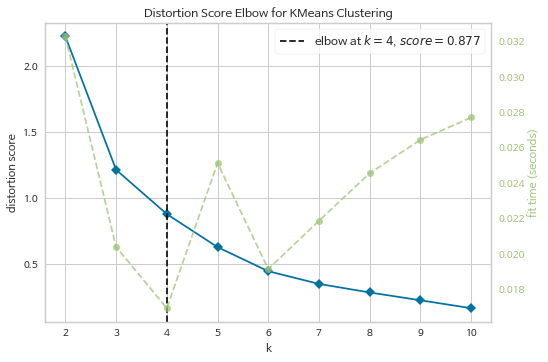

In [97]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(송파_df)
Elbow_M.show()

plt.show()

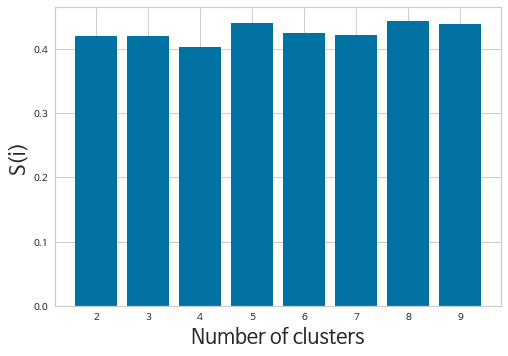

In [98]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(송파_df)
    silhouette_scores.append(silhouette_score(송파_df, m1.fit_predict(송파_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [99]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  8


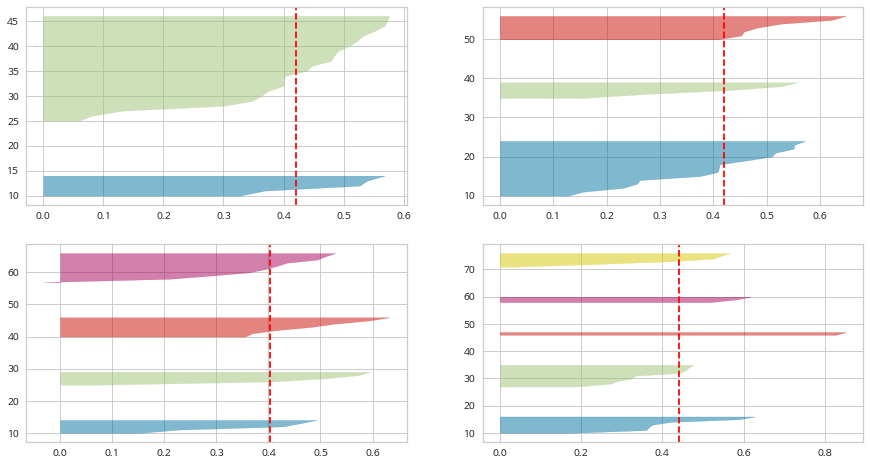

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(송파_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


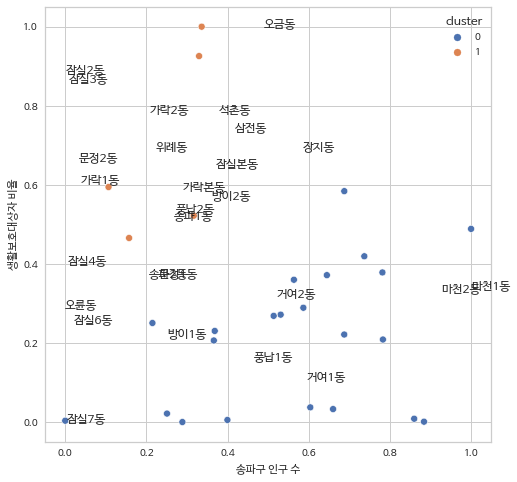

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


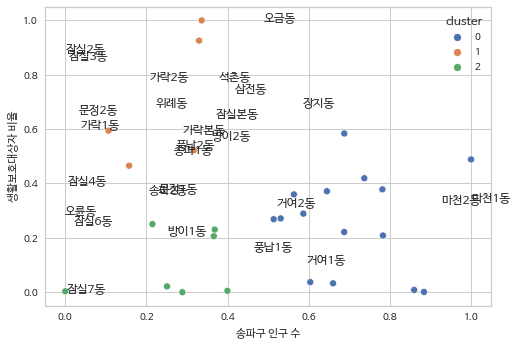

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


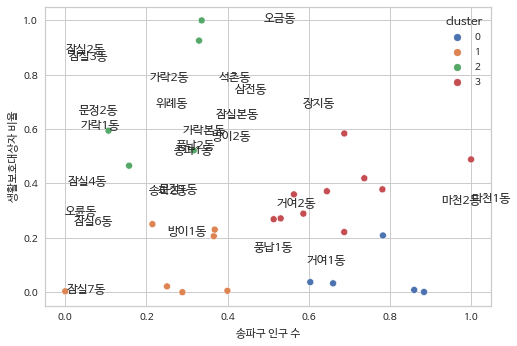

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


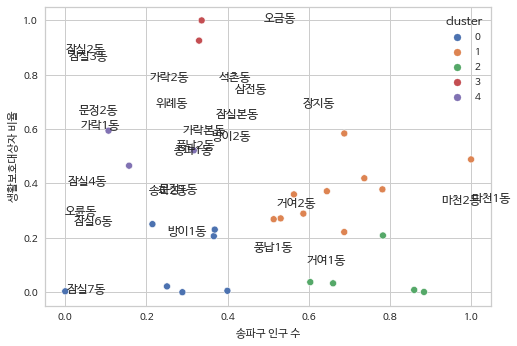

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


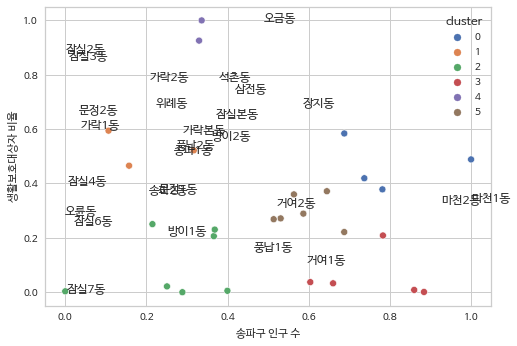

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


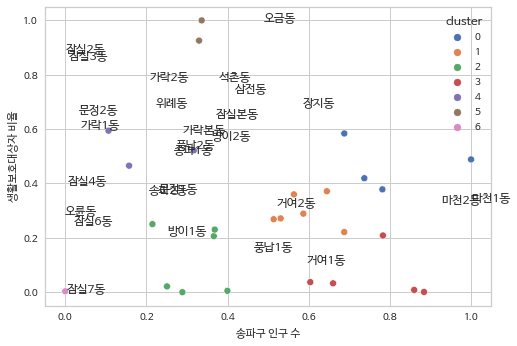

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


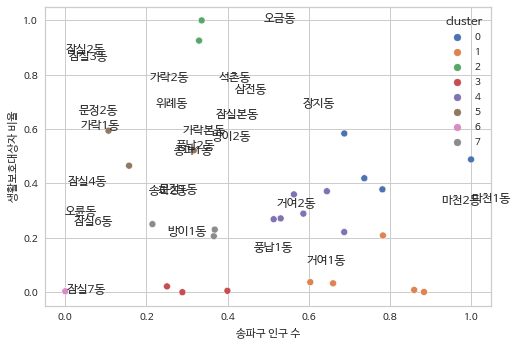

In [101]:
plt.figure(figsize = (8, 8))

for i in range(2,9):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(송파_df)
  송파_df['cluster'] = model.fit_predict(송파_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 송파_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 송파_df['생활보호대상자 비율']
  cluster_df['cluster'] = 송파_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('송파구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [102]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(송파_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
송파_df['cluster'] = model.fit_predict(송파_df)


In [103]:
송파_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    9
3    9
0    5
1    4
Name: cluster, dtype: int64

In [104]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.32099446, 0.39047392, 2.6       ],
       [0.23733412, 0.17264698, 6.75      ],
       [0.45638987, 0.37377557, 4.33333333],
       [0.77740822, 0.23979574, 0.55555556]])

In [105]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 송파_df['인구 수']
cluster_df['생활보호대상자 비율'] = 송파_df['생활보호대상자 비율']
cluster_df['cluster'] = 송파_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,풍납1동,0.157299,0.465521,2
1,풍납2동,0.530825,0.271603,2
2,거여1동,0.106635,0.594410,2
3,거여2동,0.316714,0.521952,2
4,마천1동,0.336167,1.000000,0
5,마천2동,0.329783,0.925694,0
6,방이1동,0.214850,0.250514,1
7,방이2동,0.563481,0.359906,2
8,오륜동,0.288661,0.000000,0
9,오금동,1.000000,0.488571,3


In [106]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,풍납1동,0.157299,0.465521,2
1,풍납2동,0.530825,0.271603,2
2,거여1동,0.106635,0.594410,2
3,거여2동,0.316714,0.521952,2
4,마천1동,0.336167,1.000000,0
5,마천2동,0.329783,0.925694,0
6,방이1동,0.214850,0.250514,1
7,방이2동,0.563481,0.359906,2
8,오륜동,0.288661,0.000000,0
9,오금동,1.000000,0.488571,3


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/송파_cluster.csv')

#### 6-1. 군집화

In [107]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['마천1동', '마천2동', '오륜동', '잠실4동', '잠실6동']
cluster 1 :  ['방이1동', '송파2동', '문정1동', '잠실7동']
cluster 2 :  ['풍납1동', '풍납2동', '거여1동', '거여2동', '방이2동', '송파1동', '가락본동', '잠실본동', '위례동']
cluster 3 :  ['오금동', '석촌동', '삼전동', '가락1동', '가락2동', '문정2동', '장지동', '잠실2동', '잠실3동']


#### 6-2. 클러스터별 인구수, 체육시설 수

In [108]:
# 클러스터별로 인구 수 합치기

송파_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/송파구_인구수, 수급인구비율.csv', index_col=0)
송파_peo_df = 송파_peo_df[['동', '인구 수']]
송파_peo_df = 송파_peo_df.rename(columns={'동':'dong'})
송파_peo_df

,dong,인구 수
0,풍납1동,14585.0
1,풍납2동,25703.0
2,거여1동,13077.0
3,거여2동,19330.0
4,마천1동,19909.0
5,마천2동,19719.0
6,방이1동,16298.0
7,방이2동,26675.0
8,오륜동,18495.0
9,오금동,39668.0


In [109]:
df_all = pd.merge(cluster_df, 송파_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,풍납1동,0.157299,0.465521,2,14585.0
1,풍납2동,0.530825,0.271603,2,25703.0
2,거여1동,0.106635,0.594410,2,13077.0
3,거여2동,0.316714,0.521952,2,19330.0
4,마천1동,0.336167,1.000000,0,19909.0
5,마천2동,0.329783,0.925694,0,19719.0
6,방이1동,0.214850,0.250514,1,16298.0
7,방이2동,0.563481,0.359906,2,26675.0
8,오륜동,0.288661,0.000000,0,18495.0
9,오금동,1.000000,0.488571,3,39668.0


In [110]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  97287.0
cluster 1 :  67869.0
cluster 2 :  211387.0
cluster 3 :  297383.0


In [111]:
# a+b+c+d=14

def prop(a, b, c, d):
  
  p1 = a*10000/97287
  p2 = b*10000/67869
  p3 = c*10000/211387
  p4 = d*10000/297383

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [112]:
lst = []

for i, j, k, l in product(range(15), range(15), range(15), range(15)):
  if (i+j+k+l==14):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [113]:
lst.sort()
lst

[[0.016183991916202203, (2, 1, 4, 7)],
 [0.016489419154215368, (2, 1, 5, 6)],
 [0.02813596627726045, (2, 2, 4, 6)],
 [0.03437616328608993, (2, 2, 5, 5)],
 [0.04245362156577955, (2, 1, 3, 8)],
 [0.043369903279819016, (2, 1, 6, 5)],
 [0.04847082615602147, (2, 2, 3, 7)],
 [0.05316282260274802, (1, 1, 5, 7)],
 [0.056360152697571185, (3, 1, 4, 6)],
 [0.060011156741521514, (1, 1, 4, 8)],
 [0.061628500999403306, (3, 2, 4, 5)],
 [0.06381934131237099, (3, 1, 5, 5)],
 [0.0671914171825099, (2, 2, 6, 4)],
 [0.07288954535156501, (1, 1, 6, 6)],
 [0.07480959950137767, (3, 2, 3, 6)],
 [0.07502245938501942, (3, 2, 5, 4)],
 [0.07547602097036187, (3, 1, 3, 7)],
 [0.07773319279384872, (1, 2, 5, 6)],
 [0.0786467571618059, (1, 2, 4, 7)],
 [0.09343454776788551, (1, 1, 3, 9)],
 [0.09529830810294737, (2, 1, 2, 9)],
 [0.095380742922373, (2, 2, 2, 8)],
 [0.09682544429301321, (2, 1, 7, 4)],
 [0.09785358681476128, (3, 1, 6, 4)],
 [0.10339468531348206, (1, 2, 6, 5)],
 [0.1061353784173536, (1, 2, 3, 8)],
 [0.1145657

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '마천1동', '마천2동', '오륜동', '잠실4동', '잠실6동' (2개)
- cluster1 : '방이1동', '송파2동', '문정1동', '잠실7동' (1개)
- cluster2 : '풍납1동', '풍납2동', '거여1동', '거여2동', '방이2동', '송파1동', '가락본동', '잠실본동', '위례동' (4개)
- cluster3 : '오금동', '석촌동', '삼전동', '가락1동', '가락2동', '문정2동', '장지동', '잠실2동', '잠실3동' (7개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 마천1동(1개) + 마천2동(0개) + 오륜동(2개) + 잠실4동(0개) + 잠실6동(2개) = 5개
- cluster1 : 방이1동(0개) + 송파2동(0개) + 문정1동(1개) + 잠실7동(0개) = 1개
- cluster2 : 풍납1동(0개) + 풍납2동(0개) + 거여1동(2개) + 거여2동(0개) + 방이2동(1개) + 송파1동(0개) + 가락본동(1개) + 잠실본동(0개) + 위례동(0개) = 4개
- cluster3 : 오금동(1개) + 석촌동(0개) + 삼전동(0개) + 가락1동(0개) + 가락2동(0개) + 문정2동(1개) + 장지동(1개) + 잠실2동(4개) + 잠실3동(2개) = 9개

### 7. 강남구

In [114]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

강남_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/강남구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =강남_df['동']
강남_df = 강남_df.iloc[:,2:]
강남_df = 강남_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
강남_df

,인구 수,생활보호대상자 비율
0,0.270969,0.052488
1,0.496125,0.033705
2,0.451369,0.146521
3,0.405423,0.096038
4,0.183309,0.046273
5,0.626848,0.068724
6,0.482793,0.000000
7,0.822166,0.016618
8,0.372279,0.120814
9,0.796217,0.109162


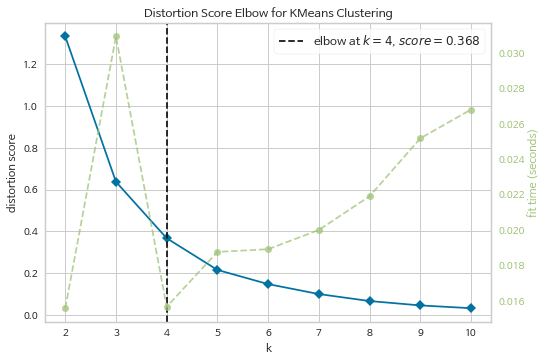

In [115]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(강남_df)
Elbow_M.show()

plt.show()

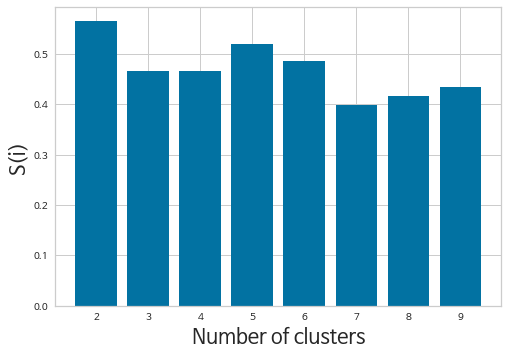

In [116]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(강남_df)
    silhouette_scores.append(silhouette_score(강남_df, m1.fit_predict(강남_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [117]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


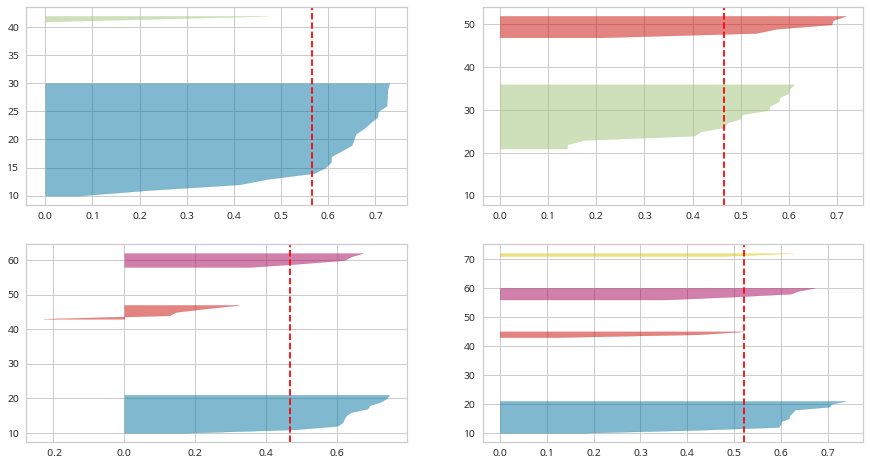

In [118]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(강남_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


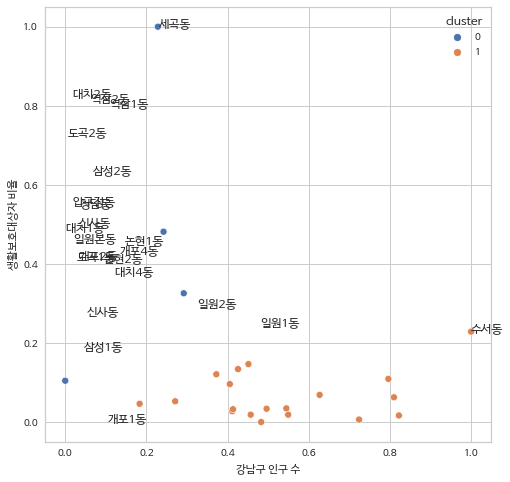

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


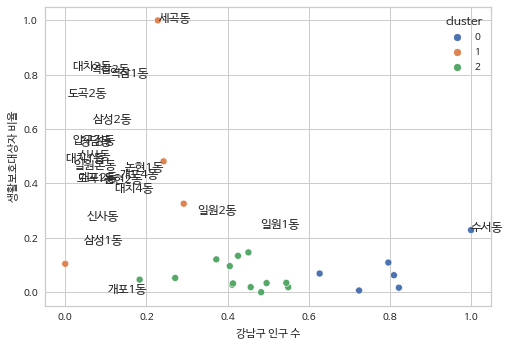

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


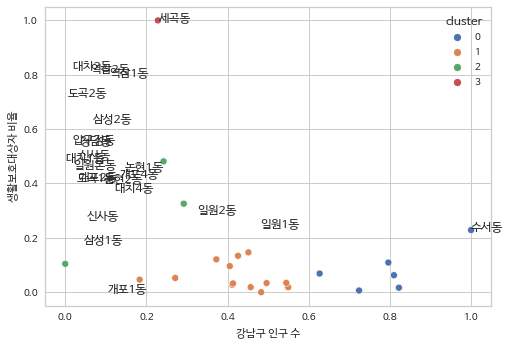

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


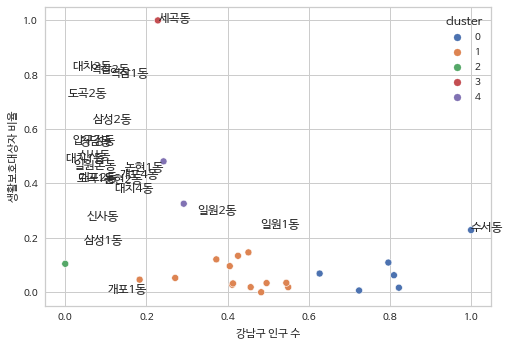

In [119]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(강남_df)
  강남_df['cluster'] = model.fit_predict(강남_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 강남_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 강남_df['생활보호대상자 비율']
  cluster_df['cluster'] = 강남_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('강남구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4

In [120]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(강남_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
강남_df['cluster'] = model.fit_predict(강남_df)

In [121]:
강남_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

1    13
2     6
0     3
3     1
Name: cluster, dtype: int64

In [122]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[2.54155094e-01, 6.02374921e-01, 3.66666667e+00],
       [4.20308669e-01, 5.85557971e-02, 1.00000000e+00],
       [7.96539258e-01, 8.20122582e-02, 2.22044605e-16],
       [0.00000000e+00, 1.04511195e-01, 2.00000000e+00]])

In [123]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 강남_df['인구 수']
cluster_df['생활보호대상자 비율'] = 강남_df['생활보호대상자 비율']
cluster_df['cluster'] = 강남_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,신사동,0.270969,0.052488,1
1,신사동,0.496125,0.033705,1
2,논현1동,0.451369,0.146521,1
3,논현2동,0.405423,0.096038,1
4,삼성1동,0.183309,0.046273,1
5,삼성2동,0.626848,0.068724,2
6,대치1동,0.482793,0.000000,1
7,대치2동,0.822166,0.016618,2
8,대치4동,0.372279,0.120814,1
9,역삼1동,0.796217,0.109162,2


In [124]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,신사동,0.270969,0.052488,1
1,신사동,0.496125,0.033705,1
2,논현1동,0.451369,0.146521,1
3,논현2동,0.405423,0.096038,1
4,삼성1동,0.183309,0.046273,1
5,삼성2동,0.626848,0.068724,2
6,대치1동,0.482793,0.000000,1
7,대치2동,0.822166,0.016618,2
8,대치4동,0.372279,0.120814,1
9,역삼1동,0.796217,0.109162,2


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/강남_cluster.csv')

#### 7-1. 군집화

In [125]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['일원1동', '일원2동', '수서동']
cluster 1 :  ['신사동', '신사동', '논현1동', '논현2동', '삼성1동', '대치1동', '대치4동', '도곡1동', '개포2동', '개포4동', '일원본동', '압구정동', '청담동']
cluster 2 :  ['삼성2동', '대치2동', '역삼1동', '역삼2동', '도곡2동', '세곡동']
cluster 3 :  ['개포1동']


#### 7-2. 클러스터별 인구수, 체육시설 수

In [126]:
# 클러스터별로 인구 수 합치기

강남_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/강남구_인구수, 수급인구비율.csv', index_col=0)
강남_peo_df = 강남_peo_df[['동', '인구 수']]
강남_peo_df = 강남_peo_df.rename(columns={'동':'dong'})
강남_peo_df

,dong,인구 수
0,신사동,16914.0
1,신사동,25426.0
2,논현1동,23734.0
3,논현2동,21997.0
4,삼성1동,13600.0
5,삼성2동,30368.0
6,대치1동,24922.0
7,대치2동,37752.0
8,대치4동,20744.0
9,역삼1동,36771.0


In [127]:
df_all = pd.merge(cluster_df, 강남_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,신사동,0.270969,0.052488,1,16914.0
1,신사동,0.270969,0.052488,1,25426.0
2,신사동,0.496125,0.033705,1,16914.0
3,신사동,0.496125,0.033705,1,25426.0
4,논현1동,0.451369,0.146521,1,23734.0
5,논현2동,0.405423,0.096038,1,21997.0
6,삼성1동,0.183309,0.046273,1,13600.0
7,삼성2동,0.626848,0.068724,2,30368.0
8,대치1동,0.482793,0.000000,1,24922.0
9,대치2동,0.822166,0.016618,2,37752.0


In [128]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  48835.0
cluster 1 :  335617.0
cluster 2 :  220699.0
cluster 3 :  6670.0


In [129]:
# a+b+c+d=12

def prop(a, b, c, d):
  
  p1 = a*10000/48835
  p2 = b*10000/335617
  p3 = c*10000/220699
  p4 = d*10000/6670

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [130]:
lst = []

for i, j, k, l in product(range(13), range(13), range(13), range(13)):
  if (i+j+k+l==12):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [131]:
lst.sort()
lst

[[0.11959681367272104, (1, 7, 4, 0)],
 [0.1286509691904826, (1, 6, 5, 0)],
 [0.13358798604343677, (1, 8, 3, 0)],
 [0.16075045259672144, (1, 5, 6, 0)],
 [0.1706244863026298, (1, 9, 2, 0)],
 [0.18259838745274232, (0, 8, 4, 0)],
 [0.18997957580147462, (0, 7, 5, 0)],
 [0.1982625269924873, (0, 9, 3, 0)],
 [0.21589526389143757, (1, 4, 7, 0)],
 [0.2204060920386842, (0, 6, 6, 0)],
 [0.23070631445030002, (1, 10, 1, 0)],
 [0.23697199442070957, (0, 10, 2, 0)],
 [0.27387793616437106, (0, 5, 7, 0)],
 [0.29408540307463094, (1, 3, 8, 0)],
 [0.29872678973740907, (0, 11, 1, 0)],
 [0.3138334704864476, (1, 11, 0, 0)],
 [0.3379147297837983, (2, 6, 4, 0)],
 [0.3486418524705891, (2, 5, 5, 0)],
 [0.35023293498548475, (2, 7, 3, 0)],
 [0.3503951081785352, (0, 4, 8, 0)],
 [0.3824143030458571, (2, 4, 6, 0)],
 [0.3835269129425859, (0, 12, 0, 0)],
 [0.3855964680756484, (2, 8, 2, 0)],
 [0.3953208701463017, (1, 2, 9, 0)],
 [0.43923208150960263, (2, 3, 7, 0)],
 [0.44400532905428947, (2, 9, 1, 0)],
 [0.449957608081176

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '일원1동', '일원2동', '수서동' (1개)
- cluster1 : '신사동', '신사동', '논현1동', '논현2동', '삼성1동', '대치1동', '대치4동', '도곡1동', '개포2동', '개포4동', '일원본동', '압구정동', '청담동' (7개)
- cluster2 : '삼성2동', '대치2동', '역삼1동', '역삼2동', '도곡2동', '세곡동' (4개)
- cluster3 : '개포1동' (0개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 일원1동(2개) + 일원2동(3개) + 수서동(2개) = 6개
- cluster1 : 신사동(2개) + 논현1동(1개) + 논현2동(1개) + 삼성1동(3개) + 대치1동(0개) + 대치4동(2개) + 도곡1동(1개) + 개포2동(0개) + 개포4동(1개) + 일원본동(1개) + 압구정동(2개) + 청담동(3개) = 17개
- cluster2 : 삼성2동(0개) + 대치2동(2개) + 역삼1동(2개) + 역삼2동(3개) + 도곡2동(2개) + 세곡동(0개) = 9개
- cluster3 : 개포1동(0개) = 0개